In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [5]:
c = cast
c.head(2)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN


In [10]:
ans1 = c.groupby(c.year//10*10).size()

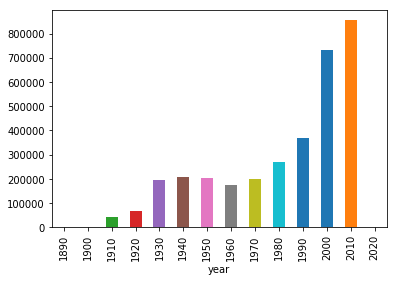

In [45]:
ans1.plot(kind = "bar")#.set_xlim(right=2010)

### Use groupby() to plot the number of "Hamlet" films made each decade.

In [51]:
c[c.title=="Hamlet"].groupby([c.title,c.year//10*10]).size()

title   year
Hamlet  1910    28
        1920     9
        1940    25
        1950     1
        1960    57
        1970    19
        1980     3
        1990    84
        2000    55
        2010    18
dtype: int64

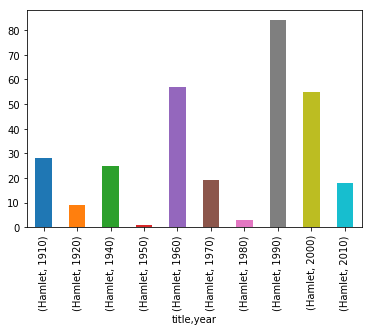

In [52]:
c[c.title=="Hamlet"].groupby([c.title,c.year//10*10]).size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [53]:
c.head(2)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN


In [59]:
c[(c.n == 1) & (c.year <=1959) & (c.year >=1950)].groupby([c.type,c.year]).size()

type     year
actor    1950    604
         1951    632
         1952    591
         1953    631
         1954    623
         1955    606
         1956    611
         1957    707
         1958    692
         1959    678
actress  1950    270
         1951    272
         1952    286
         1953    290
         1954    298
         1955    264
         1956    288
         1957    283
         1958    275
         1959    287
dtype: int64

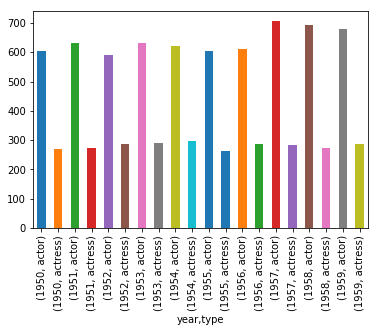

In [63]:
c[(c.n == 1) & (c.year <=1959) & (c.year >=1950)].groupby([c.year,c.type]).size().plot(kind = "bar")

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [70]:
c[(c.year >= 1950) & (c.year <=1959) & (c.n.notnull()) & (c.n <= 5)].groupby([c.type,c.year,c.n]).size()

type     year  n  
actor    1950  1.0    604
               2.0    418
               3.0    489
               4.0    519
               5.0    549
         1951  1.0    632
               2.0    437
               3.0    546
               4.0    565
               5.0    567
         1952  1.0    591
               2.0    428
               3.0    525
               4.0    513
               5.0    538
         1953  1.0    631
               2.0    450
               3.0    552
               4.0    547
               5.0    551
         1954  1.0    623
               2.0    402
               3.0    543
               4.0    523
               5.0    516
         1955  1.0    606
               2.0    395
               3.0    537
               4.0    513
               5.0    523
                     ... 
actress  1954  1.0    298
               2.0    459
               3.0    271
               4.0    246
               5.0    229
         1955  1.0    264
               2.0 

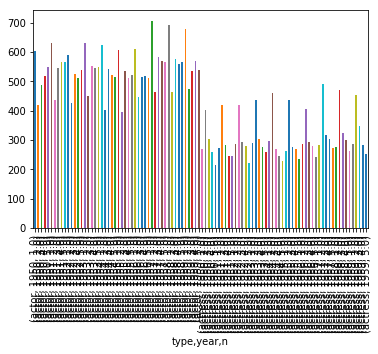

In [71]:
c[(c.year >= 1950) & (c.year <=1959) & (c.n.notnull()) & (c.n <= 5)].groupby([c.type,c.year,c.n]).size().plot(kind='bar')

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [88]:
c[c.title.str.contains("Pink Panther")].groupby([c.title]).size()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
The Pink Panther                  108
The Pink Panther 2                 82
The Pink Panther Strikes Again     73
The Return of the Pink Panther     30
Trail of the Pink Panther          40
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [89]:
c.head(2)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN


In [101]:
ans5 = c[c.name == "Frank Oz"].groupby([c.year,c.title]).size()

year  title                                         
1979  The Muppet Movie                                  8
1980  Star Wars: Episode V - The Empire Strikes Back    1
      The Blues Brothers                                1
1981  An American Werewolf in London                    2
      The Great Muppet Caper                            6
1982  The Dark Crystal                                  2
1983  Star Wars: Episode VI - Return of the Jedi        1
      Superman III                                      1
      Trading Places                                    1
1984  The Muppets Take Manhattan                        7
1985  Sesame Street Presents: Follow that Bird          3
      Spies Like Us                                     1
1986  Labyrinth                                         1
1992  Innocent Blood                                    1
      The Muppet Christmas Carol                        7
1996  Muppet Treasure Island                            4
1998  Blues Brother

In [102]:
ans5 = c[c.name == "Frank Oz"].groupby([c.year,c.title]).size()
ans5[ans5>=2]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [104]:
ans5 = c[c.name == "Frank Oz"].groupby([c.character]).size()
ans5[ans5>=2]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              5
dtype: int64